In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

Признаки:
* 1 - фиксированная кислотность
* 2 - летучая кислотность
* 3 - лимонная кислота
* 4 - остаточный сахар
* 5 - хлориды
* 6 - свободный диоксид серы
* 7 - общий диоксид серы
* 8 - плотность
* 9 - pH
* 10 - сульфаты
* 11 - алкоголь (в градусах)

Выходная переменная:

* 12 - качество (от 0 до 10)

## 1. Чтение и загрузка данных

In [3]:
df = pd.read_csv('C:\\Users\\valik\\Desktop\\winequality-red.csv')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 2. Описательные статистики

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


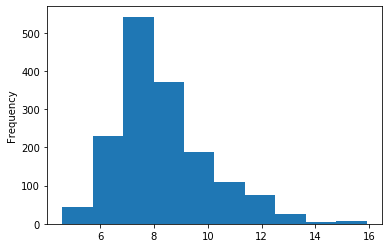

In [7]:
df['fixed acidity'].plot.hist(label='fixed acidity');

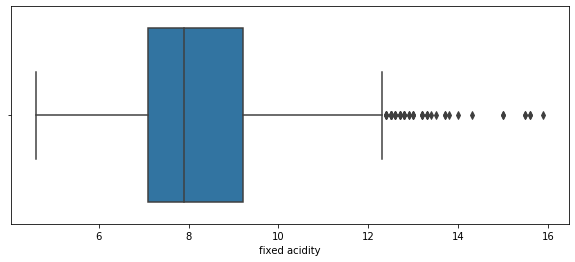

In [8]:
# Ящик с усами (boxplot)
plt.figure(figsize=(10,4))
sns.boxplot(df['fixed acidity'])

## 3. Разброс

In [9]:
# дисперсия
np.var(df['fixed acidity'], ddof=0)

3.0295205688671296

In [10]:
# стандартное отклонение (для гс)
np.std(df['fixed acidity'], ddof=0)

1.7405518001102782

## 4. Проверка гипотез

Нулевая гипотеза - распределение нормальное, альтернативная гипотеза - не имеем нормальное распределение

In [12]:
stat, p = scipy.stats.shapiro(df['fixed acidity'])

In [13]:
alpha = 0.05

In [14]:
display(p)

1.5255951637239901e-24

Поскольку полученное значение p-value меньше за alpha = 0.05, то мы отклоняем нулевую гипотезу

In [15]:
half = len(df['fixed acidity'])/2
sample1 = df.loc[:half, 'fixed acidity']
sample2 = df.loc[half:, 'fixed acidity']

In [16]:
sample1

0       7.4
1       7.8
2       7.8
3      11.2
4       7.4
       ... 
795    10.8
796     8.7
797     9.3
798     9.4
799     9.4
Name: fixed acidity, Length: 800, dtype: float64

In [17]:
sample2

800     7.2
801     8.6
802     5.1
803     7.7
804     8.4
       ... 
1594    6.2
1595    5.9
1596    6.3
1597    5.9
1598    6.0
Name: fixed acidity, Length: 799, dtype: float64

Нулевая гипотеза - средние равны, альтернативная гипотеза - средние наших двух выборок не равны

In [18]:
scipy.stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=13.080546772524473, pvalue=3.232112538986592e-37)

Нулевую гипотезу отвергаем

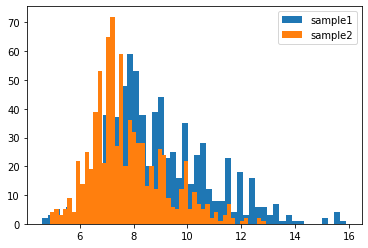

In [19]:
plt.hist(sample1, bins=50, label='sample1')
plt.hist(sample2, bins=50, label='sample2')
plt.legend(loc='upper right')
plt.show()

In [20]:
sample1.median()

8.4

In [21]:
sample2.median()

7.5

## 5. Корреляция

In [22]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


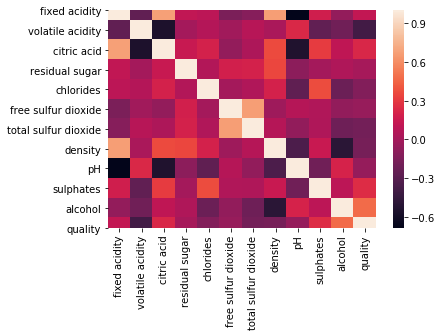

In [24]:
sns.heatmap(df.corr())

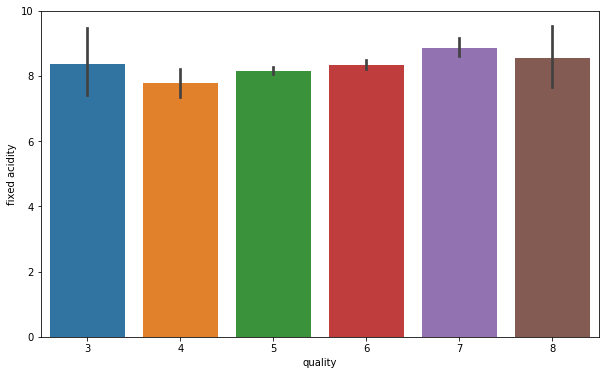

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

С графика видим, что fixed acidity не коррелирует с качеством вина и не дает возможность класифицировать качество вина по этому признаку

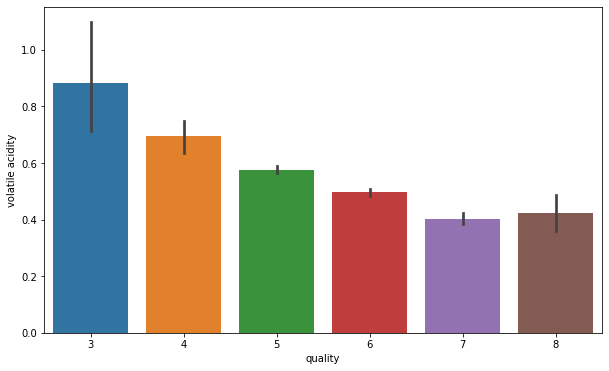

In [30]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

Здесь виден тренд на понижение volatile acidity с увеличением качества вина

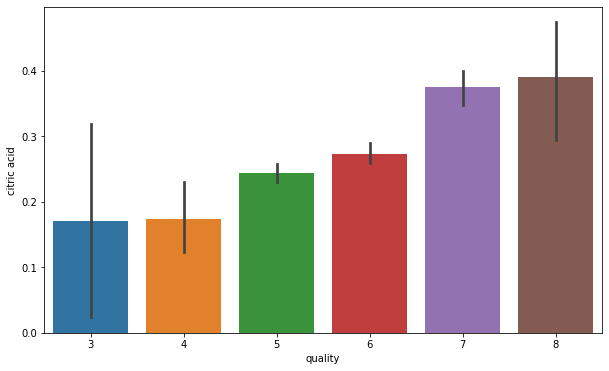

In [32]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

Citric acid увеличивается с увеличением качества вина

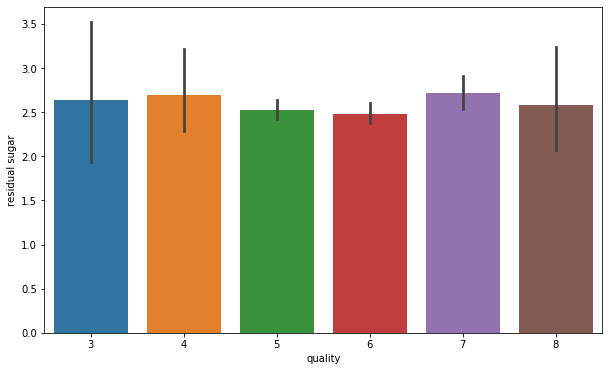

In [33]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

Тренда нет, как и в случае с fixed acidity

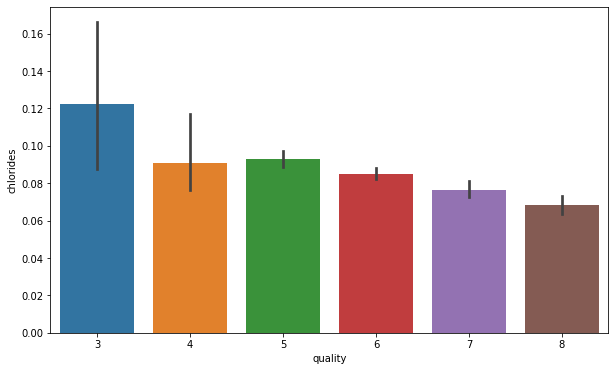

In [34]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

Тренд на понижение chlorides с увеличением качества

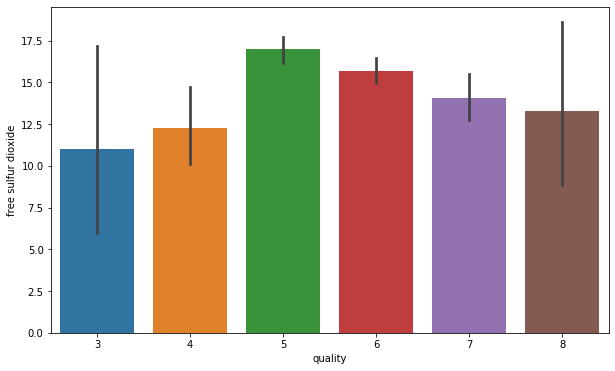

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

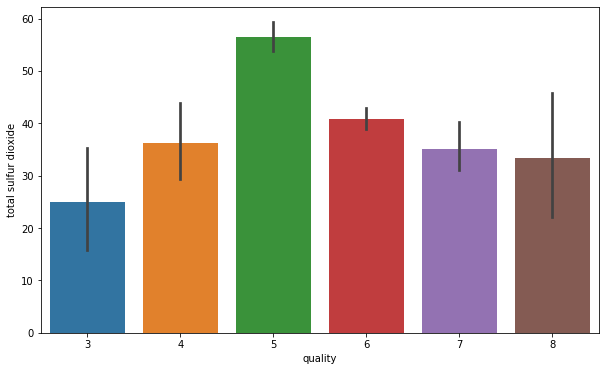

In [36]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

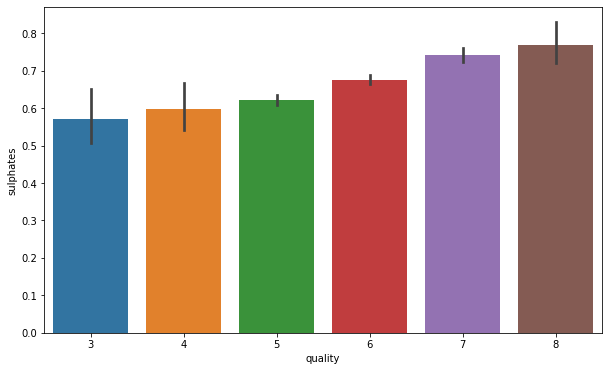

In [37]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

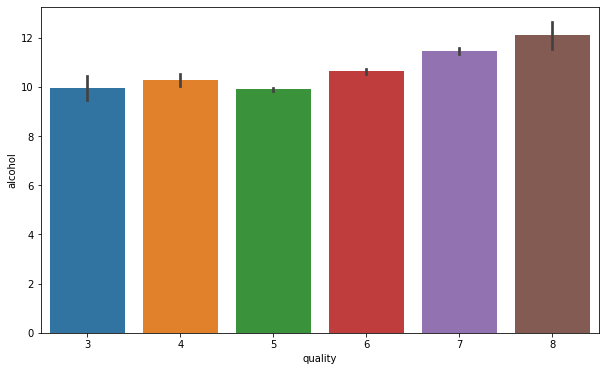

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

## 6. Предобработка данных

Поделим качество вина на хорошее и плохое для бинарной класификации

In [40]:
bins = (2, 6.5, 8)
quality_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = quality_names)
print(df['quality'])

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]


In [42]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])
print(df['quality'])

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32


In [43]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

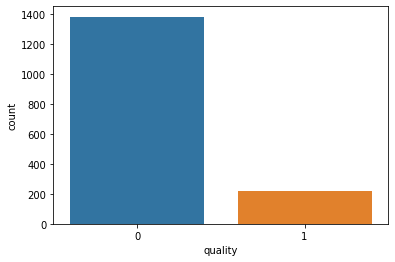

In [44]:
sns.countplot(df['quality'])

In [45]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
# выполяем стандартизацию
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 7. Строим модель

#### Random Forest

In [48]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       278
           1       0.79      0.45      0.58        42

    accuracy                           0.91       320
   macro avg       0.86      0.72      0.76       320
weighted avg       0.91      0.91      0.90       320



Random Forest Classifier выдал точность 91%

In [49]:
print(confusion_matrix(y_test, pred_rfc))

[[273   5]
 [ 23  19]]


#### Stochastic Gradient Descent Classifier

In [50]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       278
           1       0.49      0.52      0.51        42

    accuracy                           0.87       320
   macro avg       0.71      0.72      0.71       320
weighted avg       0.87      0.87      0.87       320



Stochastic Gradient Descent Classifier выдал точность 87%

#### Support Vector Classifier

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       278
           1       0.65      0.26      0.37        42

    accuracy                           0.88       320
   macro avg       0.77      0.62      0.65       320
weighted avg       0.86      0.88      0.86       320



Support Vector Classifier выдал точность 88%